In [680]:
import csv
import os
from collections import defaultdict
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
total_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'EDITORIAL', 'SUCURSAL', 'DESC_SUCURSAL', 'COD_BARRAS_LIBRO', 'NUM_TITULO', 'SIG_TOPOGRAFICA',
    'DEWEY', 'II_SUMARIO', 'I_SUMARIO', 'EDICION', 'LOCALIZACION_EJEMPLAR', 'DESC_LOCALIZACION_EJEMPLAR', 'POLITICA',
    'DESC_POLITICA_EJEMPLAR', 'ISBN', 'FECHA_REGISTRO_EJEMPLAR', 'FECHA_ADICION_EJEMPLAR', 'FECHA_PUB',
    'ESTADO_EJEMPLAR', 'PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION', 'NIVEL_EDUCACION', 'AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO', 'SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO', 'FECHA_REAL_DEVOLUCION',
]

In [3]:
used_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'SUCURSAL', 'COD_BARRAS_LIBRO', 'DEWEY', 'DESC_LOCALIZACION_EJEMPLAR',
    'FECHA_PUB','PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION','NIVEL_EDUCACION','AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO','SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO','FECHA_REAL_DEVOLUCION'
]

# Datos limpios

In [4]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_totales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 22.9 s, sys: 1.19 s, total: 24.1 s
Wall time: 25.5 s


In [5]:
prestamos_df.shape

(3054360, 20)

In [6]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-01-22,2015-02-04
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-03-31,2015-04-07
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-07,2015-11-17
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-21,2015-01-28


## Engagement

#### Número total de préstamos

In [7]:
total_prestamos = prestamos_df.shape[0]
total_prestamos

3054360

#### Número total de lectores

In [8]:
total_lectores = len(prestamos_df.groupby('COD_BARRAS_LECTOR'))
total_lectores

156392

#### Media de préstamos por lector

In [9]:
media_prestamos_lector = total_prestamos / total_lectores
media_prestamos_lector

19.530154995140418

#### Duración total de todos los préstamos (en días)

In [10]:
# %%time

# total_dias = 0
# for i, p in prestamos_df.iterrows():
#     delta = p['DATE_DEVOLUCION'] - p['DATE_PRESTAMO']
#     total_dias += delta.days

# CPU times: user 9min 1s, sys: 710 ms, total: 9min 2s
# Wall time: 9min 1s

total_dias = 39277158

In [11]:
total_dias

39277158

#### Duración media de cada préstamos (en días)

In [12]:
media_dias = total_dias / prestamos_df.shape[0]
media_dias

12.85937414057282

#### Tiempo total medio de préstamos por lector

In [13]:
total_media_tiempo_con_libro = media_prestamos_lector * media_dias
total_media_tiempo_con_libro

251.14557010588777

#### Tasa de tiempo con libros en préstamos por lector

In [14]:
tasa = total_media_tiempo_con_libro / (366 + 365 + 365 + 365 + 366)
tasa

0.13746336623201302

# Visualizaciones

In [30]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

### Número de préstamos por mes

In [394]:
# %%time

# def month_year(x):
#     return pd.tslib.Timestamp(day=1, month=x['DATE_PRESTAMO'].month, year=x['DATE_PRESTAMO'].year)

# def only_year(x):
#     return pd.tslib.Timestamp(day=1, month=1, year=x['DATE_PRESTAMO'].year)

# prestamos_df['MES'] = prestamos_df.apply(month_year, axis=1)
# prestamos_df['AÑO'] = prestamos_df.apply(only_year, axis=1)

# CPU times: user 15min 43s, sys: 2.73 s, total: 15min 46s
# Wall time: 15min 46s

CPU times: user 15min 43s, sys: 2.73 s, total: 15min 46s
Wall time: 15min 46s


In [403]:
# %%time

# prestamos_df.to_csv('prestamos_mensuales_anuales.csv', index=False)

# CPU times: user 2min, sys: 1.01 s, total: 2min 1s
# Wall time: 2min 2s

CPU times: user 2min, sys: 1.01 s, total: 2min 1s
Wall time: 2min 2s


In [405]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
    'MES': pd.tslib.Timestamp,
    'AÑO': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_mensuales_anuales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION', 'MES', 'AÑO'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 24.1 s, sys: 2.15 s, total: 26.2 s
Wall time: 40 s


In [406]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,...,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION,MES,AÑO
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,...,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-01-22,2015-02-04,2015-01-01,2015-01-01
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,...,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-03-31,2015-04-07,2015-03-01,2015-01-01
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,...,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-07,2015-11-17,2015-11-01,2015-01-01
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,...,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16,2015-01-01,2015-01-01
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,...,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-21,2015-01-28,2015-01-01,2015-01-01


In [407]:
prestamos_mes = prestamos_df.groupby('MES')['TITULO'].count()

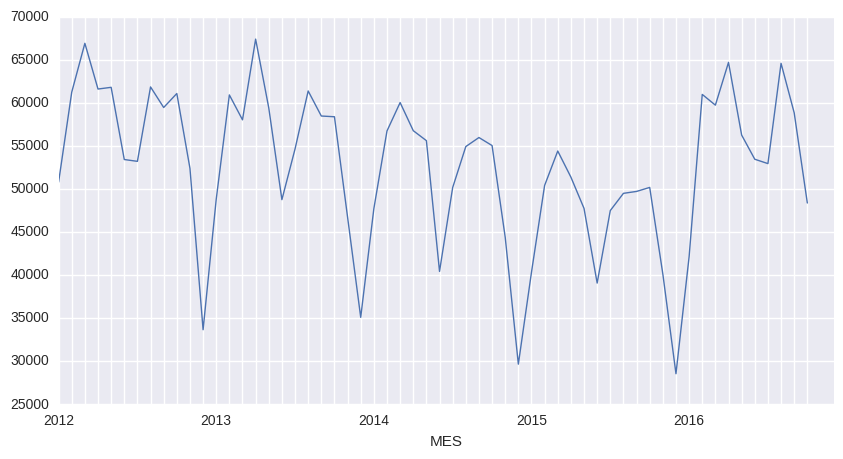

In [546]:
prestamos_mes.plot(figsize=(10,5), xlim=('2012-01-01', '2016-12-31'), xticks=prestamos_mes.index)

### Títulos populares por topic

In [409]:
prestamos_topic_ok_df = prestamos_df[('000' <= prestamos_df['DEWEY']) & (prestamos_df['DEWEY'] <= '999')]

In [410]:
prestamos_por_topic_y_titulo = prestamos_topic_ok_df.groupby(['DEWEY', 'TITULO'])['AUTOR'].count()

In [411]:
top_10 = prestamos_por_topic_y_titulo.groupby(level=0).nlargest(10)

In [412]:
top_10['303']

DEWEY  TITULO                                                      
303    La violencia en Colombia                                        368
       La era de la información : economía, sociedad y cultura         313
       De la mano de Alicia : lo social y lo político en la postmod    215
       Las 48 leyes del poder                                          190
       Movimientos sociales, Estado y democracia en Colombia           189
       Política cultural [y] cultura política : una nueva mirada so    186
       Violencia política en Colombia : de la nación fragmentada a     178
       Paramilitares y autodefensas : 1982-2003                        177
       Modernidad líquida                                              164
       Más allá de la noche : una historia de amor y de guerra         163
Name: AUTOR, dtype: int64

In [413]:
top_10['320']

DEWEY  TITULO                                                      
320    El príncipe                                                     557
       El pensamiento colombiano en el siglo XIX                       375
       Microfísica del poder                                           294
       Historia de las ideas políticas                                 219
       El contrato social : o, principios del derecho político J. J    204
       Seguridad, territorio, población : curso en el collège de Fr    204
       El nacionalismo cosmopolita : la referencia europea en la co    202
       La modernización en Colombia : los años de Laureano Gómez 18    195
       El contrato social                                              190
       Cuadernos de la cárcel                                          180
Name: AUTOR, dtype: int64

In [414]:
top_10['616']

DEWEY  TITULO                                                      
616    Principios de medicina interna                                  640
       Patología estructural y funcional                               529
       Harrison principios de medicina interna                         441
       Semiología médica : fisiopatología, semiotecnia y propedéuti    298
       Neuroanatomía clínica                                           278
       Microbiología médica                                            261
       Microbiología médica : Jawetz, Melnick y Adelberg               185
       Microbiología médica de Jawetz, Melnick y Adelberg              181
       Inmunología                                                     178
       Los anormales : curso en el College de France (1974-1975)       171
Name: AUTOR, dtype: int64

In [415]:
top_10['986']

DEWEY  TITULO                                                      
986    Historia doble de la Costa                                      663
       Manual de historia de Colombia                                  437
       Historia de Bogotá                                              388
       Historia de Colombia                                            381
       Colombia : país fragmentado, sociedad dividida, su historia     352
       Colombia una nación a pesar de sí misma : de los tiempos pre    344
       Entre la legitimidad y la violencia : Colombia 1875-1994        216
       Historia de Colombia : todo lo que hay que saber                213
       El carnero                                                      200
       La hybris del punto cero : ciencia, raza e ilustración en la    186
Name: AUTOR, dtype: int64

### Número de usuarios por fecha

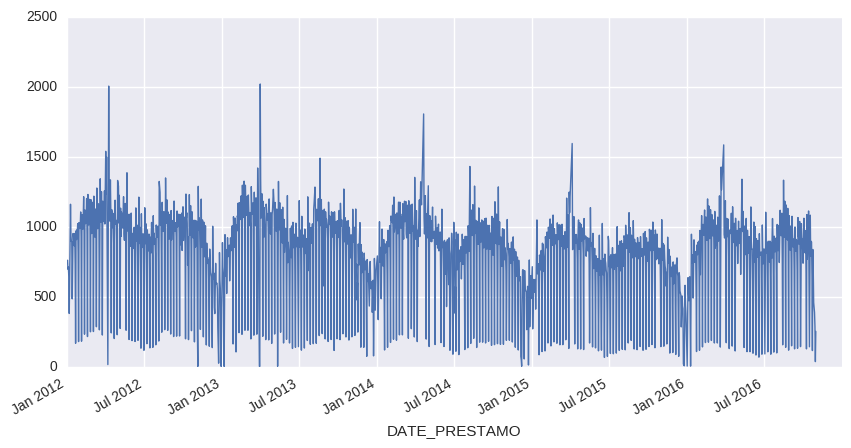

In [416]:
prestamos_df.groupby('DATE_PRESTAMO')['COD_BARRAS_LECTOR'].nunique().plot(
    figsize=(10,5),
    xlim=('01-01-2012', '31-12-2016'),
)

### Número de usuarios por sucursal y por fecha

#### Número de usuarios por sucursal

In [420]:
lectores_sucursal = prestamos_df.groupby('SUCURSAL_PRESTAMO')['COD_BARRAS_LECTOR'].nunique()

In [421]:
lectores_sucursal

SUCURSAL_PRESTAMO
ARM        1504
BAR         896
BLAA      84051
BUC        1485
BUE         509
CAL         932
CAR        2254
CASAGO     5768
CATMAN       40
CUC         492
ESPE       5142
FLO        2073
GIR        2867
HON        1357
IBA        6914
IEC           1
IPI        3992
LET        2020
MAN        4736
MED         776
MON         429
NEI        2753
PAS        7201
PER        6450
POP        6581
QUI        1044
RIO         614
SAN        1457
SIN        1859
STM        1869
TUN        9939
VAL        1559
VIL         950
Name: COD_BARRAS_LECTOR, dtype: int64

#### Número de usuarios por año

In [422]:
lectores_ano = prestamos_df.groupby('AÑO')['COD_BARRAS_LECTOR'].nunique()

In [423]:
lectores_ano

AÑO
2012-01-01    45329
2013-01-01    46779
2014-01-01    46230
2015-01-01    45547
2016-01-01    44803
Name: COD_BARRAS_LECTOR, dtype: int64

#### Número de usuarios por sucursal y año

In [457]:
lectores_sucursal_ano = prestamos_df.groupby(['SUCURSAL_PRESTAMO', 'AÑO'])['COD_BARRAS_LECTOR'].nunique()

In [476]:
for sucursal, group in lectores_sucursal_ano.groupby(level=0):
    print(group)
    print()

SUCURSAL_PRESTAMO  AÑO       
ARM                2012-01-01    345
                   2013-01-01    443
                   2014-01-01    433
                   2015-01-01    494
                   2016-01-01    519
Name: COD_BARRAS_LECTOR, dtype: int64

SUCURSAL_PRESTAMO  AÑO       
BAR                2012-01-01    294
                   2013-01-01    301
                   2014-01-01    272
                   2015-01-01    259
                   2016-01-01    308
Name: COD_BARRAS_LECTOR, dtype: int64

SUCURSAL_PRESTAMO  AÑO       
BLAA               2012-01-01    27106
                   2013-01-01    26414
                   2014-01-01    24852
                   2015-01-01    23109
                   2016-01-01    20175
Name: COD_BARRAS_LECTOR, dtype: int64

SUCURSAL_PRESTAMO  AÑO       
BUC                2012-01-01    574
                   2013-01-01    564
                   2014-01-01    505
                   2015-01-01    470
                   2016-01-01    463
Name: COD_BAR

### Número de usuarios por fecha

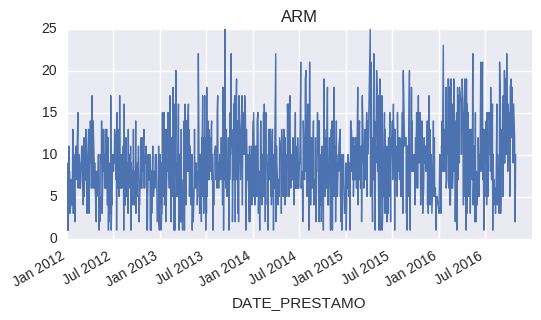

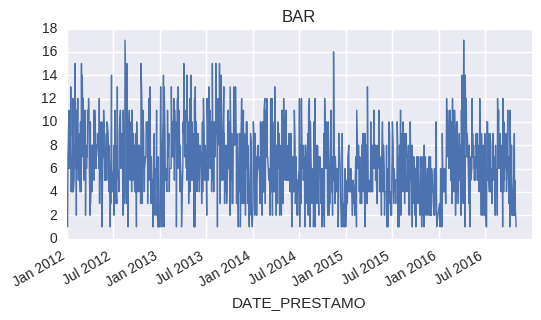

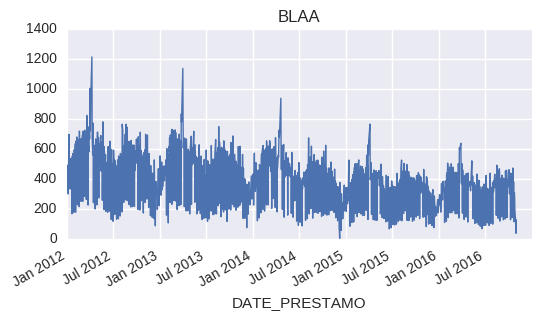

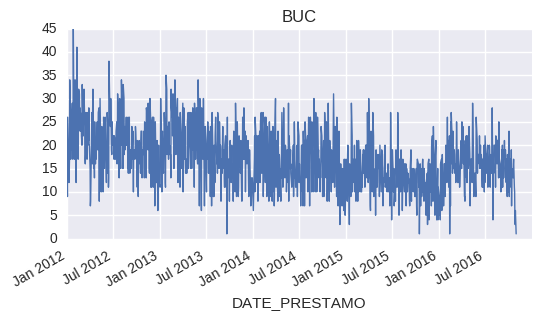

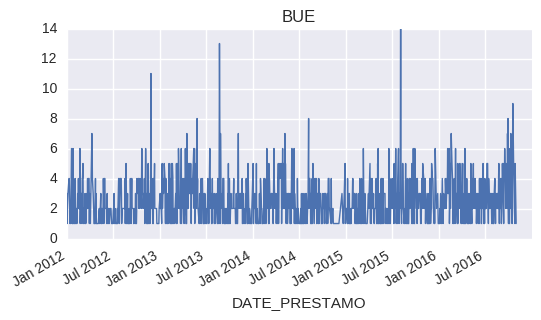

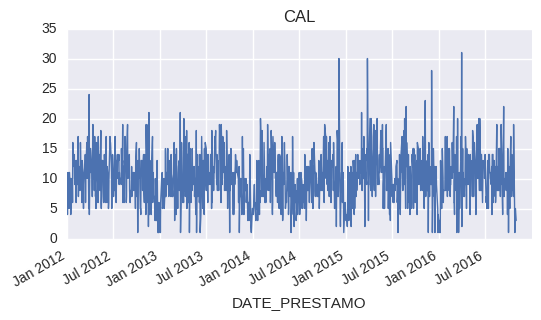

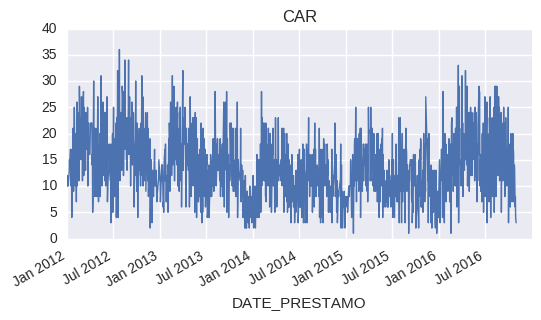

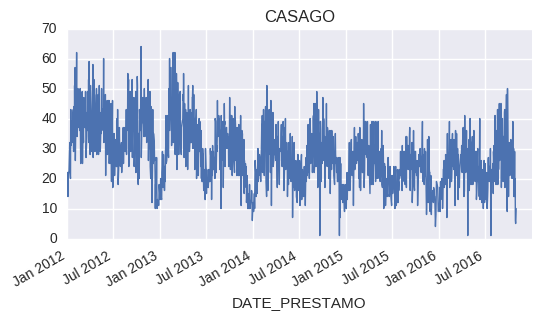

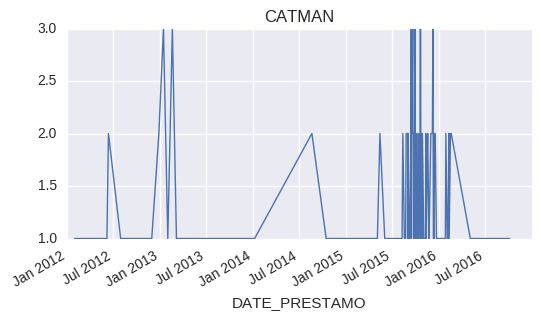

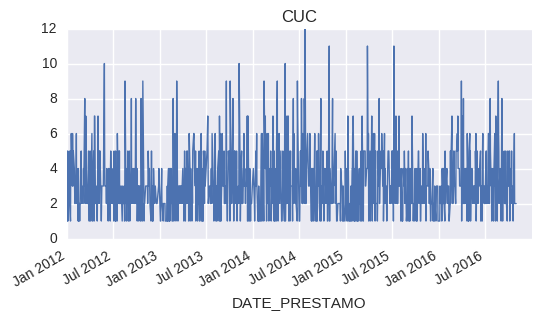

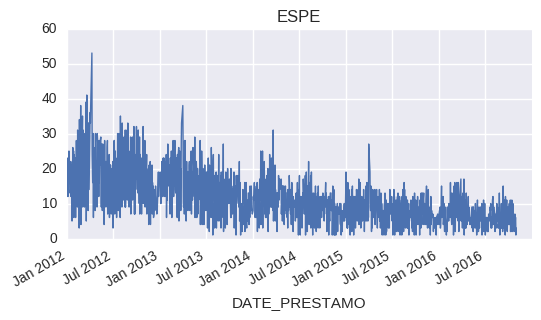

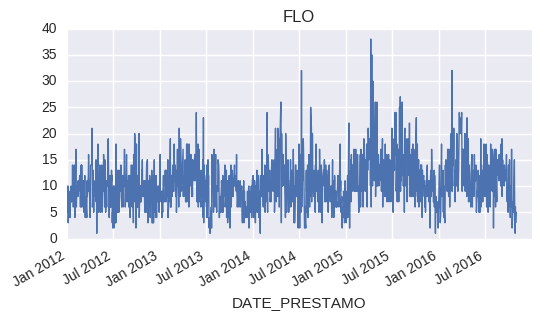

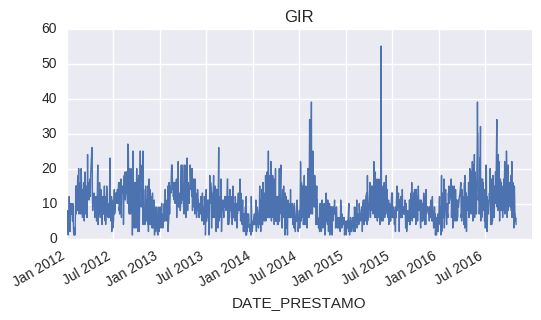

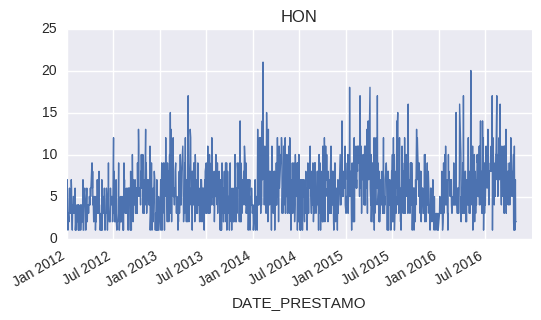

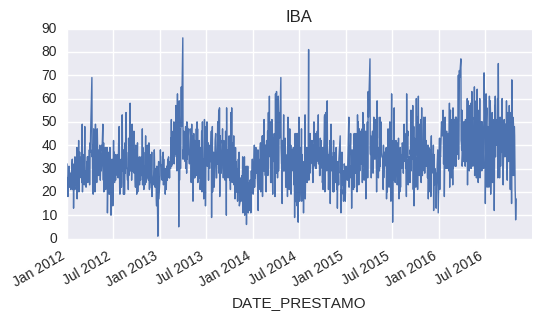

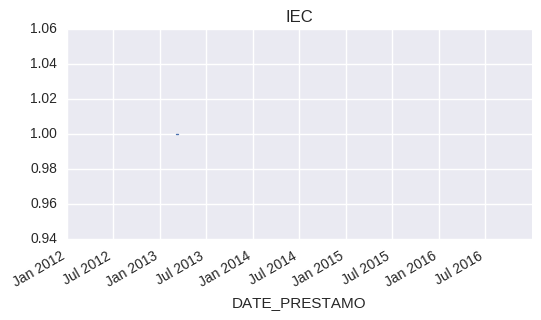

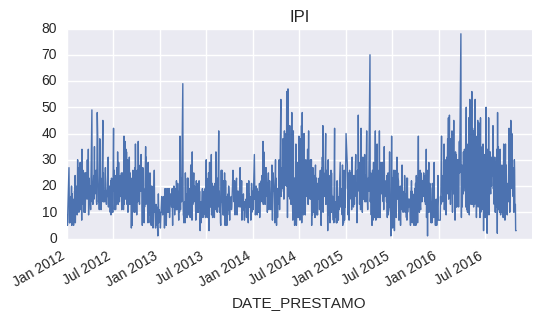

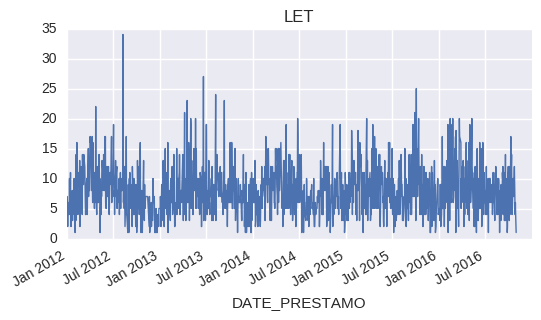

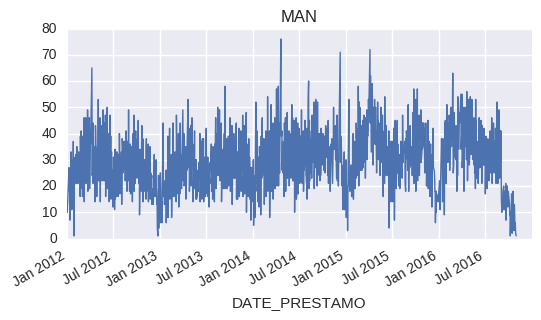

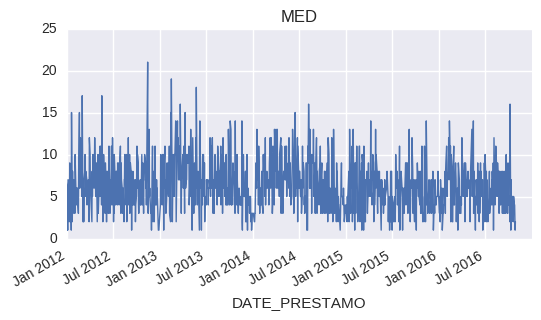

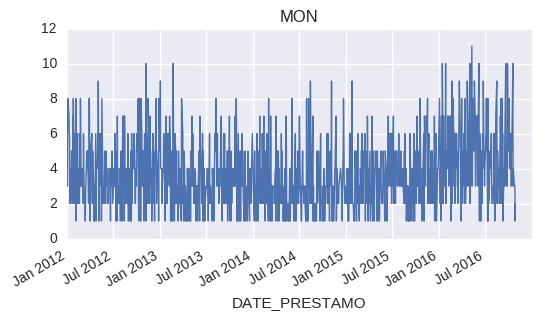

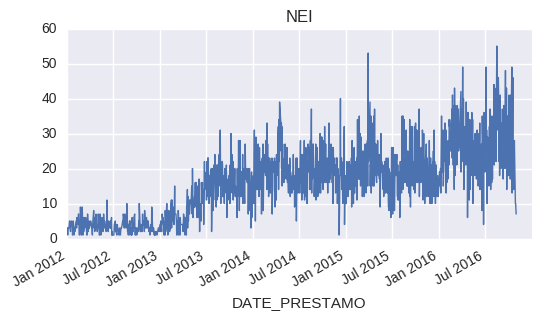

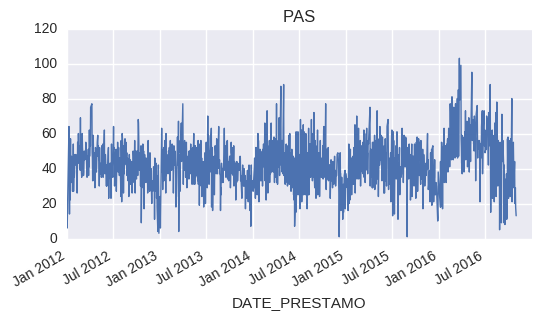

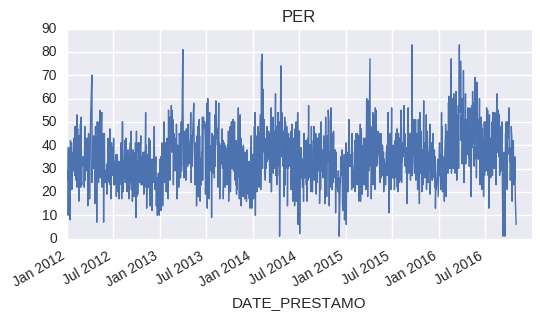

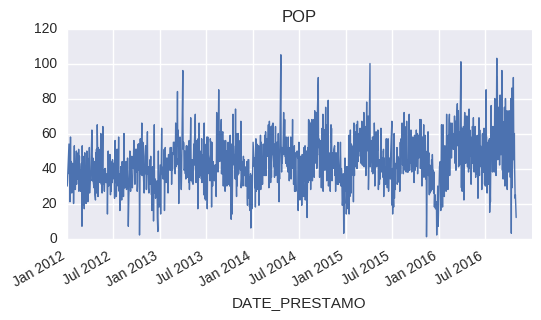

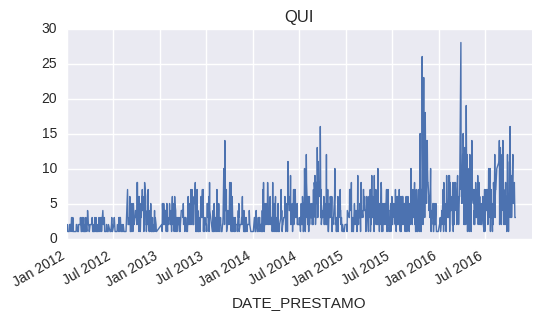

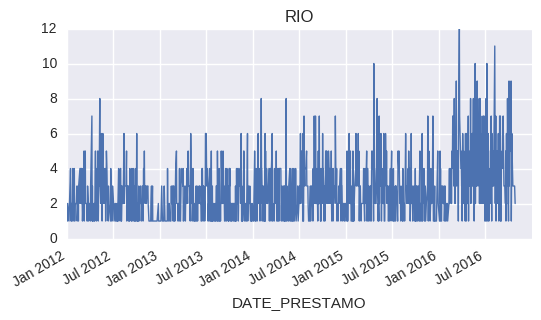

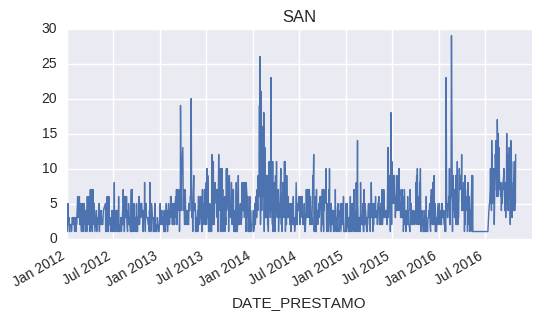

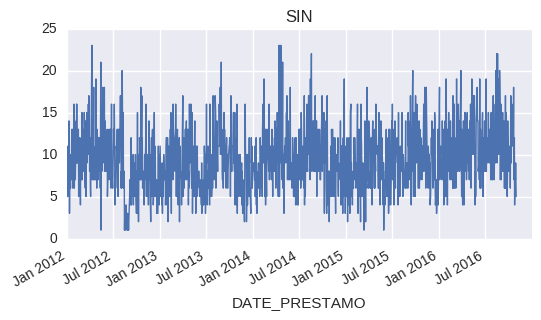

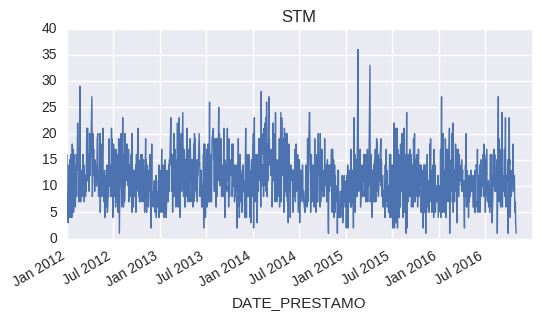

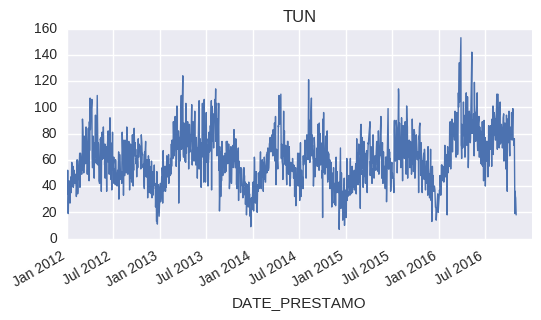

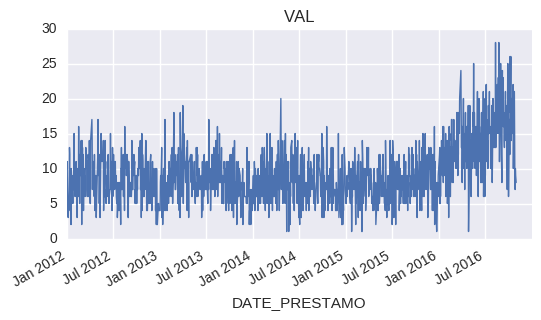

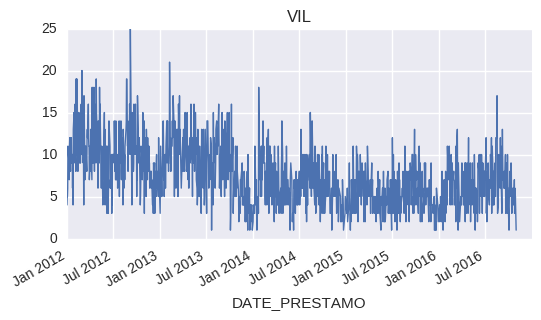

In [231]:
for sucursal, group in prestamos_df.groupby('SUCURSAL_PRESTAMO'):
    plt.figure()
    group.groupby('DATE_PRESTAMO')['COD_BARRAS_LECTOR'].nunique().plot(
        figsize=(6,3),
        xlim=('01-01-2012', '31-12-2016'),
        title=sucursal,
    )

### Altas nuevos usuarios

In [358]:
prestamos_por_mes = prestamos_mensuales_df.groupby('MES')['COD_BARRAS_LECTOR']

In [365]:
altas = {}
total = set()
for month, group in prestamos_por_mes:
    new = set(group.unique()).difference(total)
    altas[month] = new
    total = total.union(new)

In [367]:
n_altas = {}
for k in altas:
    n_altas[k] = len(altas[k])

In [382]:
altas_sr = pd.Series(n_altas)

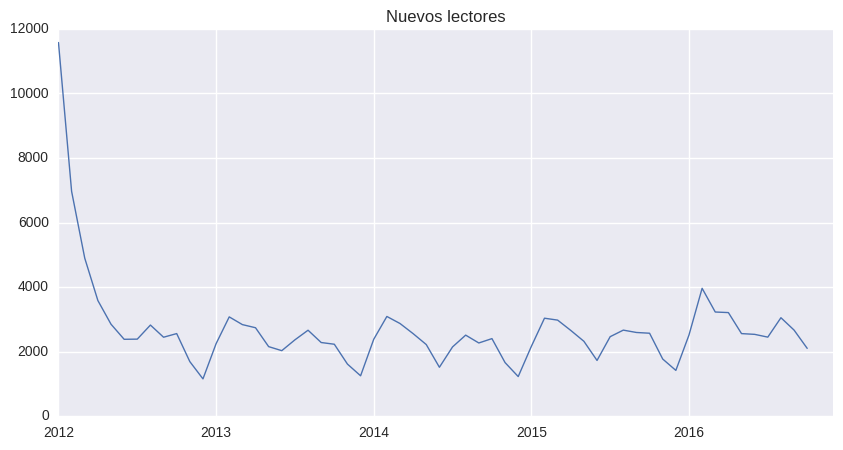

In [385]:
altas_sr.plot(
    figsize=(10,5),
    xlim=('01-01-2012', '31-12-2016'),
    title='Nuevos lectores',
)

In [386]:
altas_sr.sum()

156392

In [387]:
altas_sr.sum() == total_lectores

True

### Préstamos entre sucursales

#### Modelos de préstamos

In [484]:
# MODEL  SUC_LIBRO  SUC_PRéST  SUC_DEVOLUCIóN
#  m1       A          B          C
#  m2       B          B          C
#  m3       A          B          B
#  m4       B          B          B
#  m5       A          B          A

In [491]:
prestamos_m1_df = prestamos_df[
    (prestamos_df['SUCURSAL'] != prestamos_df['SUCURSAL_PRESTAMO']) &
    (prestamos_df['SUCURSAL_PRESTAMO'] != prestamos_df['SUCURSAL_DEVOLUCION']) &
    (prestamos_df['SUCURSAL_DEVOLUCION'] != prestamos_df['SUCURSAL'])
]

In [492]:
len(prestamos_m1_df)

7063

In [493]:
prestamos_m2_df = prestamos_df[
    (prestamos_df['SUCURSAL'] == prestamos_df['SUCURSAL_PRESTAMO']) &
    (prestamos_df['SUCURSAL_PRESTAMO'] != prestamos_df['SUCURSAL_DEVOLUCION']) &
    (prestamos_df['SUCURSAL_DEVOLUCION'] != prestamos_df['SUCURSAL'])
]

In [494]:
len(prestamos_m2_df)

62598

In [495]:
prestamos_m3_df = prestamos_df[
    (prestamos_df['SUCURSAL'] != prestamos_df['SUCURSAL_PRESTAMO']) &
    (prestamos_df['SUCURSAL_PRESTAMO'] == prestamos_df['SUCURSAL_DEVOLUCION']) &
    (prestamos_df['SUCURSAL_DEVOLUCION'] != prestamos_df['SUCURSAL'])
]

In [496]:
len(prestamos_m3_df)

415679

In [497]:
prestamos_m4_df = prestamos_df[
    (prestamos_df['SUCURSAL'] == prestamos_df['SUCURSAL_PRESTAMO']) &
    (prestamos_df['SUCURSAL_PRESTAMO'] == prestamos_df['SUCURSAL_DEVOLUCION']) &
    (prestamos_df['SUCURSAL_DEVOLUCION'] == prestamos_df['SUCURSAL'])
]

In [498]:
len(prestamos_m4_df)

2501731

In [499]:
prestamos_m5_df = prestamos_df[
    (prestamos_df['SUCURSAL'] != prestamos_df['SUCURSAL_PRESTAMO']) &
    (prestamos_df['SUCURSAL_PRESTAMO'] != prestamos_df['SUCURSAL_DEVOLUCION']) &
    (prestamos_df['SUCURSAL_DEVOLUCION'] == prestamos_df['SUCURSAL'])
]

In [500]:
len(prestamos_m5_df)

67289

In [501]:
len(prestamos_m1_df) + len(prestamos_m2_df) + len(prestamos_m3_df) + len(prestamos_m4_df) + len(prestamos_m5_df)

3054360

In [502]:
len(prestamos_df)

3054360

#### Préstamos interbibliotecarios

In [485]:
# m1 & m3 & m5
prestamos_interbibliotecarios_df = prestamos_df[prestamos_df['SUCURSAL'] != prestamos_df['SUCURSAL_PRESTAMO']]

In [486]:
len(prestamos_interbibliotecarios_df)

490031

In [511]:
prestamos_sucursales_ano = prestamos_interbibliotecarios_df.groupby(['SUCURSAL', 'AÑO'])['TITULO'].count()

In [512]:
for sucursal, group in prestamos_sucursales_ano.groupby(level=0):
    print(group)
    print()

SUCURSAL  AÑO       
ARM       2012-01-01    208
          2013-01-01    260
          2014-01-01    150
          2015-01-01    405
          2016-01-01    323
Name: TITULO, dtype: int64

SUCURSAL  AÑO       
BLAA      2012-01-01    99663
          2013-01-01    89879
          2014-01-01    77420
          2015-01-01    68863
          2016-01-01    64580
Name: TITULO, dtype: int64

SUCURSAL  AÑO       
BUE       2012-01-01    415
          2013-01-01    351
          2014-01-01    327
          2015-01-01    490
          2016-01-01    413
Name: TITULO, dtype: int64

SUCURSAL  AÑO       
CAL       2012-01-01    219
          2013-01-01    235
          2014-01-01    184
          2015-01-01    221
          2016-01-01    206
Name: TITULO, dtype: int64

SUCURSAL  AÑO       
CAR       2012-01-01    1718
          2013-01-01    1937
          2014-01-01    1696
          2015-01-01    2347
          2016-01-01    2123
Name: TITULO, dtype: int64

SUCURSAL  AÑO       
CASAGO    2012-01-0

## Año préstamo/publicación

In [615]:
prestamos_pub_df = prestamos_df[prestamos_df['FECHA_PUB'].map(len) == 4]

In [616]:
prestamos_pub_df.is_copy = False

In [617]:
prestamos_pub_df['FECHA_PUB'] = prestamos_pub_df['FECHA_PUB'].map(int)

### Número de préstamos por año de publicación

In [618]:
prestamos_pub = prestamos_pub_df.groupby('FECHA_PUB')['TITULO'].count()

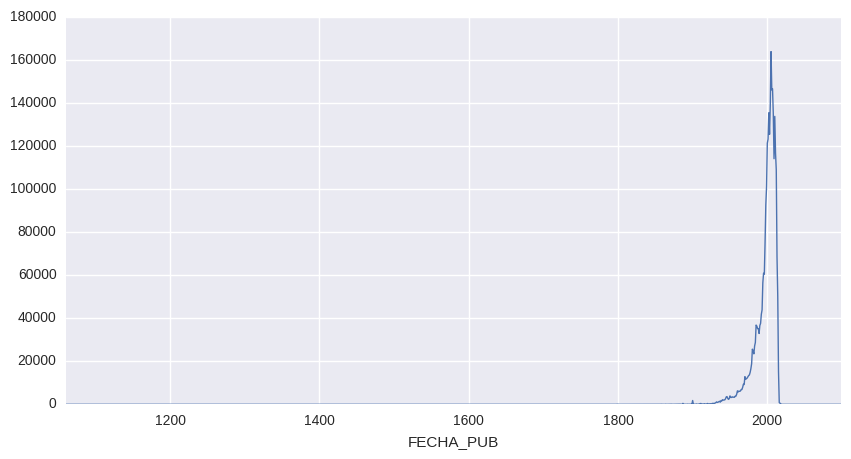

In [610]:
prestamos_pub.plot(figsize=(10,5))

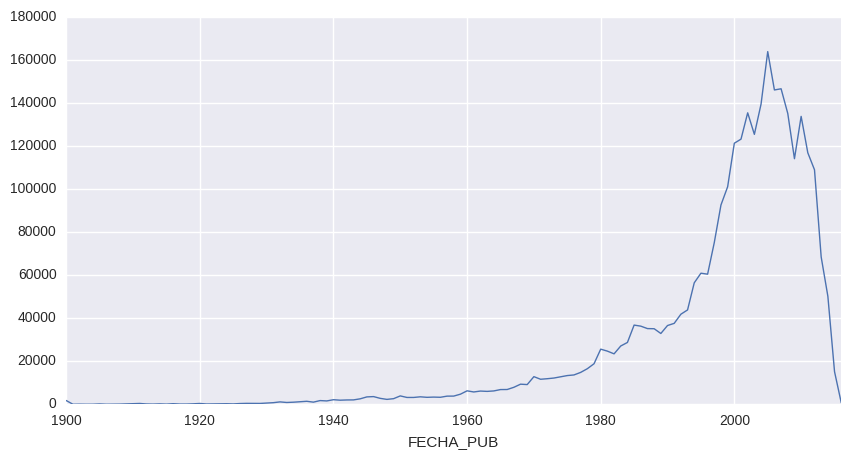

In [611]:
prestamos_pub.plot(figsize=(10,5), xlim=(1900, 2016))

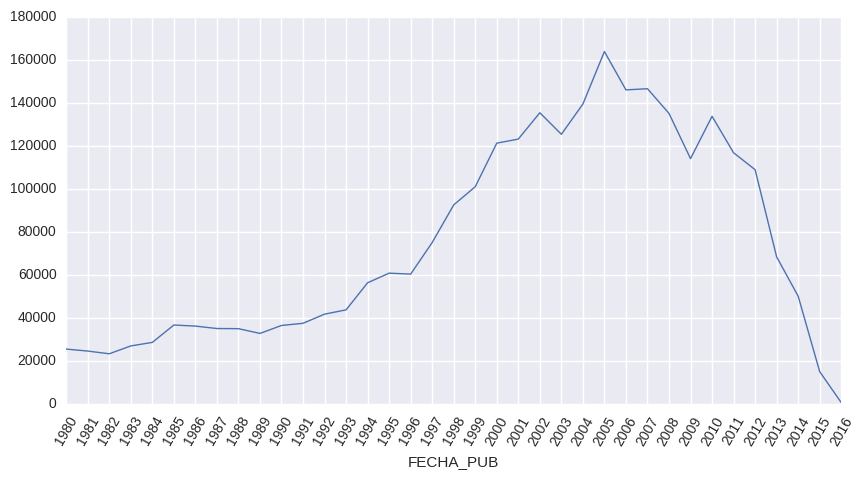

In [612]:
prestamos_pub.plot(figsize=(10,5), xlim=(1980, 2016), xticks=prestamos_pub.index, rot=60)

### Correlación año de préstamo / año de publicación

In [651]:
prestamos_corr_prest_pub = prestamos_pub_df.groupby(['AÑO', 'FECHA_PUB'])['TITULO'].count()

In [652]:
prestamos_corr = prestamos_corr_prest_pub.unstack(level=0)
prestamos_corr = prestamos_corr.fillna(0)

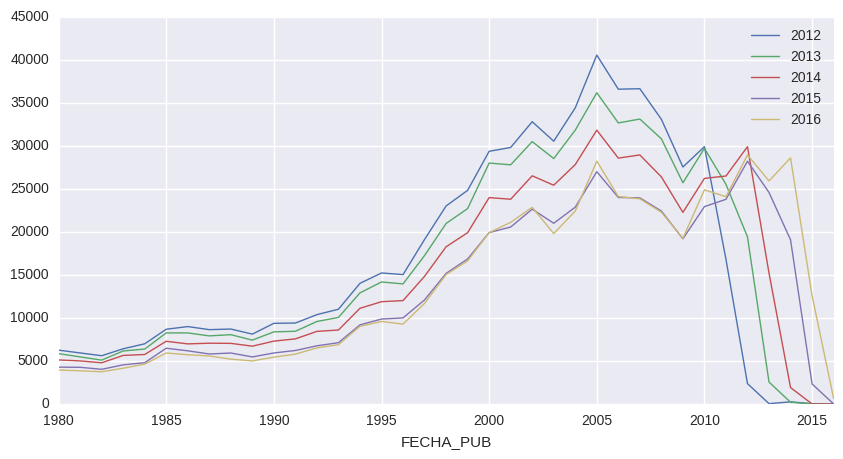

In [667]:
ax = prestamos_corr.plot(figsize=(10,5), xlim=(1980, 2016))
ax.legend([x.year for x in prestamos_corr.columns])

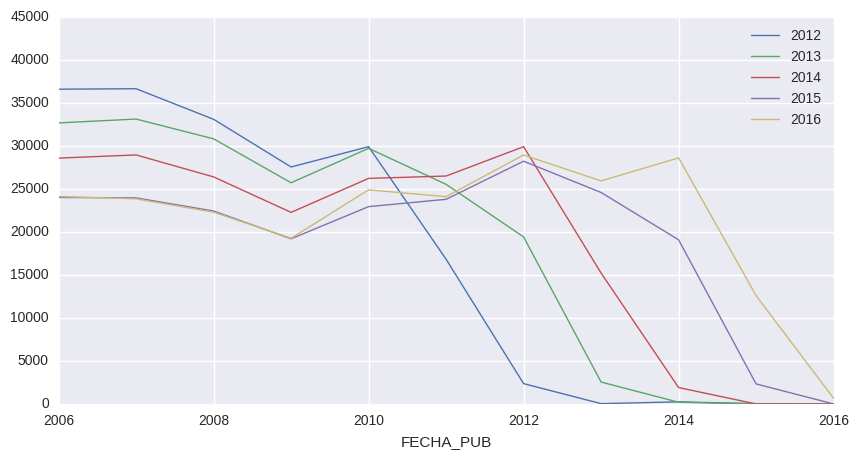

In [666]:
ax = prestamos_corr.plot(figsize=(10,5), xlim=(2006, 2016))
ax.legend([x.year for x in prestamos_corr.columns])

## Comparación préstamos mensuales

In [696]:
valid_dates = pd.date_range('2012-1-1', '2016-12-31', freq='MS')

In [698]:
qqq={}
qqq[list(valid_dates)[0]] = 2

In [699]:
qqq

{Timestamp('2012-01-01 00:00:00', freq='MS'): 2}

In [702]:
qqq[pd.tslib.Timestamp('2012-01-01')]

2

In [706]:
7 if 3==4 else 2

2

In [734]:
d1 = {}
for vd in valid_dates:
    d2 = {}
    pm = vd - relativedelta(months=1)
    py = vd - relativedelta(years=1)
    d2['N_PRESTAMOS'] = int(prestamos_mes[vd]) if vd in prestamos_mes else None
    d2['N_PRS_MES_ANTERIOR'] = d1[pm]['N_PRESTAMOS'] if pm in d1 else None
    d2['VAR_MENSUAL'] = '%.2f%%' % (100 * (prestamos_mes[vd] - d1[pm]['N_PRESTAMOS']) / d1[pm]['N_PRESTAMOS']) if pm in d1 and vd in prestamos_mes and d1[pm]['N_PRESTAMOS'] is not None and prestamos_mes[vd] is not None else None
    d2['N_PRS_AÑO_ANTERIOR'] = d1[py]['N_PRESTAMOS'] if py in d1 else None
    d2['VAR_ANUAL'] = '%.2f%%' % (100 * (prestamos_mes[vd] - d1[py]['N_PRESTAMOS']) / d1[py]['N_PRESTAMOS']) if py in d1 and vd in prestamos_mes and d1[py]['N_PRESTAMOS'] is not None and prestamos_mes[vd] is not None else None
    d1[vd] = d2
comparacion_mensual = pd.DataFrame(d1, index=[
        'N_PRESTAMOS',
        'N_PRS_MES_ANTERIOR',
        'VAR_MENSUAL',
        'N_PRS_AÑO_ANTERIOR',
        'VAR_ANUAL',
    ]).transpose()

In [735]:
comparacion_mensual

,N_PRESTAMOS,N_PRS_MES_ANTERIOR,VAR_MENSUAL,N_PRS_AÑO_ANTERIOR,VAR_ANUAL
2012-01-01,50801,NaN,NaN,NaN,NaN
2012-02-01,61250,50801,20.57%,None,None
2012-03-01,66926,61250,9.27%,None,None
2012-04-01,61615,66926,-7.94%,None,None
2012-05-01,61814,61615,0.32%,None,None
2012-06-01,53430,61814,-13.56%,None,None
2012-07-01,53218,53430,-0.40%,None,None
2012-08-01,61859,53218,16.24%,None,None
2012-09-01,59471,61859,-3.86%,None,None
2012-10-01,61096,59471,2.73%,None,None


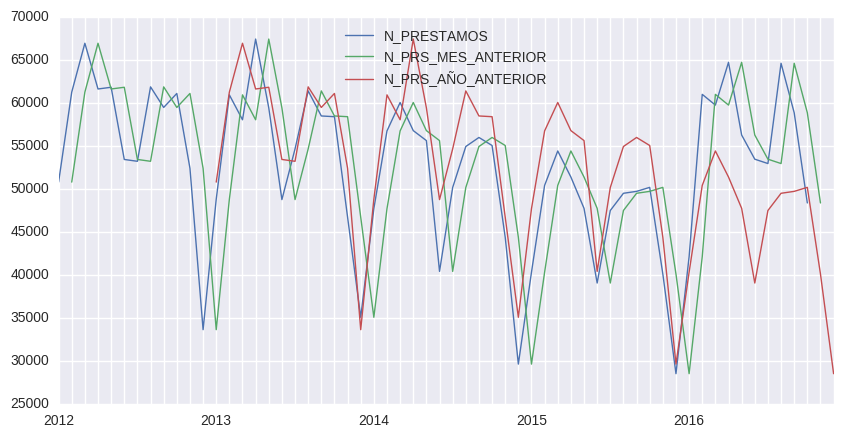

In [736]:
comparacion_mensual.plot(figsize=(10,5), xticks=comparacion_mensual.index)

In [695]:
'2012-06-01' in prestamos_mes

True

In [671]:
prestamos_mes['2012-06-01']

53430

In [677]:
timedelta(f1 + 1)

ValueError: Cannot add integral value to Timestamp without freq.

In [683]:
f1=prestamos_mes.index[0]

In [684]:
f1

Timestamp('2012-01-01 00:00:00')

In [707]:
f1 - relativedelta(months=1)

Timestamp('2011-12-01 00:00:00')

In [708]:
f1 - relativedelta(years=1)

Timestamp('2011-01-01 00:00:00')

In [678]:
f2=pd.tslib.Timestamp('2012-06-01')

In [679]:
f2

Timestamp('2012-06-01 00:00:00')

In [690]:
np.NaN

nan

In [328]:
s1=set()
s1.add(1)
s1.add(2)
s1.add(3)

s2=set()
s2.add(1)
s.add(4)

In [329]:
s1.difference(s2)

{2, 3}

In [330]:
s2.difference(s1)

{4}

{2, 3}

In [262]:
g['y'].count()

x
1    2
2    2
Name: y, dtype: int64

In [263]:
g['y'].sum()

x
1     4
2    10
Name: y, dtype: int64

In [264]:
g['y'].max()

x
1    2
2    8
Name: y, dtype: int64

In [265]:
g['y'].nunique()

x
1    1
2    2
Name: y, dtype: int64

In [240]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
               'D' : np.random.randn(8)})

In [241]:
df

,A,B,C,D
0,foo,one,0.216939,0.453139
1,bar,one,-0.293006,0.823773
2,foo,two,0.384191,0.285601
3,bar,three,1.731752,0.516755
4,foo,two,-0.415645,0.870521
5,bar,two,1.032571,1.142271
6,foo,one,0.781179,-0.677602
7,foo,three,1.038941,-0.756746


In [242]:
grouped = df.groupby('A')

In [254]:
grouped.corr()

C         D
A                        
bar C  1.000000 -0.329952
    D -0.329952  1.000000
foo C  1.000000 -0.955986
    D -0.955986  1.000000

In [341]:
g = df.groupby('x')

In [342]:
d = {}
for a, b in g:
    t = 0
    d[a] = {}
    for c in b:
        if c != 'x':
            t += b[c].sum()
            d[a][c] = t

In [343]:
d

{1: {'y': 3, 'z': 12}, 2: {'y': 10, 'z': 22}, 3: {'y': 6, 'z': 9}}

In [344]:
pd.DataFrame(d).transpose()

,y,z
1,3,12
2,10,22
3,6,9
